# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Combined_df = pd.merge(study_results, mouse_metadata, how="left")

# Display the data table for preview
Combined_df = Combined_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                               'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

Combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice = Combined_df["Mouse ID"].value_counts()
number_of_mice = len(mice)
number_of_mice

249

In [26]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice= Combined_df.loc[Combined_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [27]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice = Combined_df.loc[Combined_df["Mouse ID"]== "g989"]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = Combined_df[Combined_df["Mouse ID"].isin(duplicate_mice)==False]
cleaned_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [29]:
# Checking the number of mice in the clean DataFrame.
unique_mice=cleaned_df["Mouse ID"].value_counts()
unique_mice_of_mice=len(unique_mice)
unique_mice_of_mice

249

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

# Calculate summary statistics by drug regimen
summary_stats = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
   'mean',
   'median',
   'var',
   'std',
   'sem'
]).round(3)

# Rename columns for clarity 
summary_stats = summary_stats.rename(columns={
   'mean': 'Mean',
   'median': 'Median', 
   'var': 'Variance',
   'std': 'Standard Deviation',
   'sem': 'SEM'
})

# Display summary statistics
print("Summary Statistics for Tumor Volumes by Drug Regimen:")
print("-" * 70)
print(summary_stats)

# Optional - export to CSV
summary_stats.to_csv('tumor_volume_stats.csv')

Summary Statistics for Tumor Volumes by Drug Regimen:
----------------------------------------------------------------------
                Mean  Median  Variance  Standard Deviation    SEM
Drug Regimen                                                     
Capomulin     40.676  41.558    24.948               4.995  0.329
Ceftamin      52.591  51.776    39.290               6.268  0.470
Infubinol     52.885  51.821    43.129               6.567  0.492
Ketapril      55.236  53.699    68.554               8.280  0.604
Naftisol      54.332  52.509    66.173               8.135  0.596
Placebo       54.034  52.289    61.168               7.821  0.581
Propriva      52.323  50.855    42.351               6.508  0.513
Ramicane      40.217  40.673    23.487               4.846  0.321
Stelasyn      54.233  52.432    59.451               7.710  0.573
Zoniferol     53.237  51.818    48.533               6.967  0.516


In [39]:
# Create advanced summary statistics using agg method
summary_stats_advanced = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
   'mean', 'median', 'var', 'std', 'sem'
]).round(3)

# Rename columns 
summary_stats_advanced.columns = ['Mean', 'Median', 'Variance', 'Std Dev', 'SEM']

# Display formatted table
print("Summary Statistics by Drug Regimen:")
print("-" * 70)
print(summary_stats_advanced)

# Optional - save to CSV
summary_stats_advanced.to_csv('tumor_volume_stats_advanced.csv')

Summary Statistics by Drug Regimen:
----------------------------------------------------------------------
                Mean  Median  Variance  Std Dev    SEM
Drug Regimen                                          
Capomulin     40.676  41.558    24.948    4.995  0.329
Ceftamin      52.591  51.776    39.290    6.268  0.470
Infubinol     52.885  51.821    43.129    6.567  0.492
Ketapril      55.236  53.699    68.554    8.280  0.604
Naftisol      54.332  52.509    66.173    8.135  0.596
Placebo       54.034  52.289    61.168    7.821  0.581
Propriva      52.323  50.855    42.351    6.508  0.513
Ramicane      40.217  40.673    23.487    4.846  0.321
Stelasyn      54.233  52.432    59.451    7.710  0.573
Zoniferol     53.237  51.818    48.533    6.967  0.516


## Bar and Pie Charts

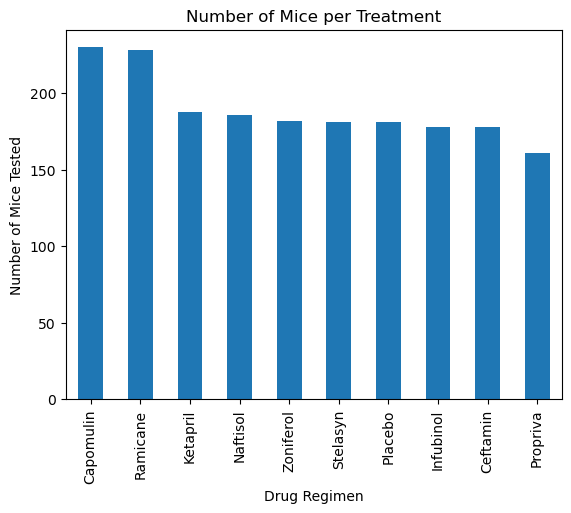

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = cleaned_df["Drug Regimen"].value_counts()
plot_pandas = mice_count.plot.bar(color='tab:blue')  
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice per Treatment")

plt.show()

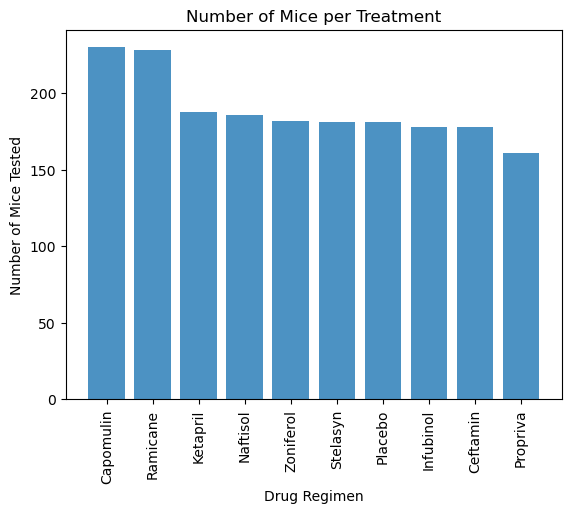

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values
plt.bar(x_axis, y_axis, color='tab:blue', alpha=0.8, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Treatment")

plt.show()

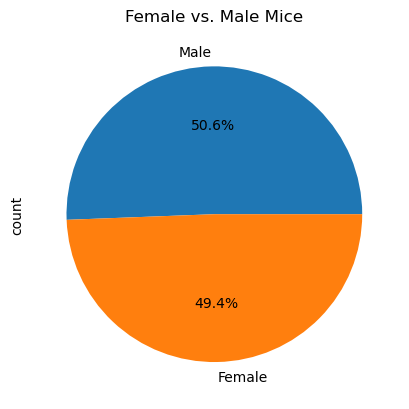

In [42]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
gender_data = cleaned_df["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.title("Female vs. Male Mice")
plt.show()

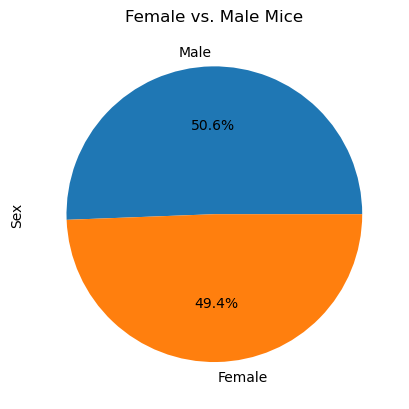

In [43]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
labels = ['Female', 'Male']
sizes = [49.4, 50.6]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.title("Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
by_mice = Combined_df.groupby(["Mouse ID"]).max()
by_mice_reset = by_mice.reset_index()

merged_data = by_mice_reset[['Mouse ID','Timepoint']].\
    merge(Combined_df,on=['Mouse ID','Timepoint'],how="left")

def get_outliers(regimen):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data
    
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [45]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = Combined_df[Combined_df["Drug Regimen"].isin(drug_list)]
drugs.head()

last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)

treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

/var/folders/j5/k10__xzx4vg4137jr9wwfprm0000gp/T/ipykernel_75178/2338363348.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= red_dot)


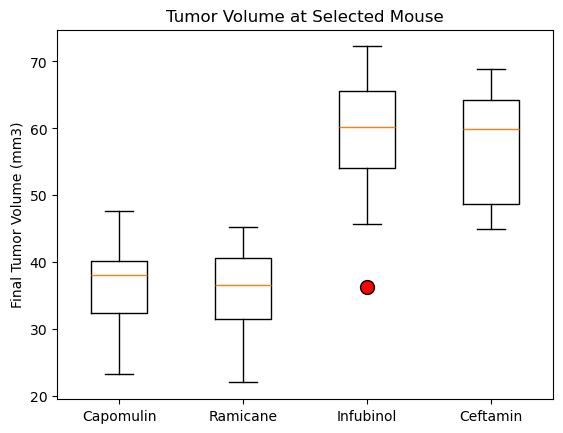

In [46]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor = "red", markersize=10)
plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume at Selected Mouse')


plt.show()

## Line and Scatter Plots

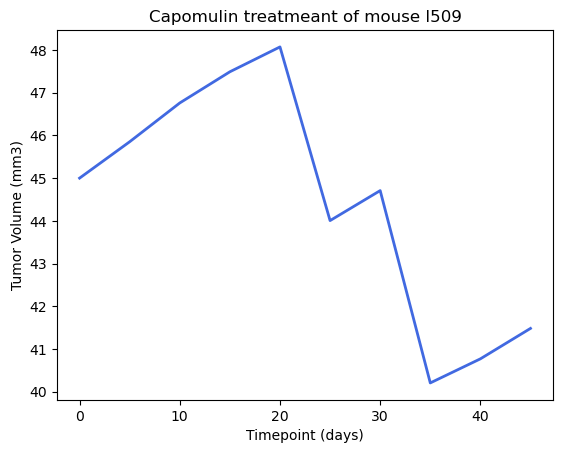

In [47]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]

forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2,color="royalblue", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

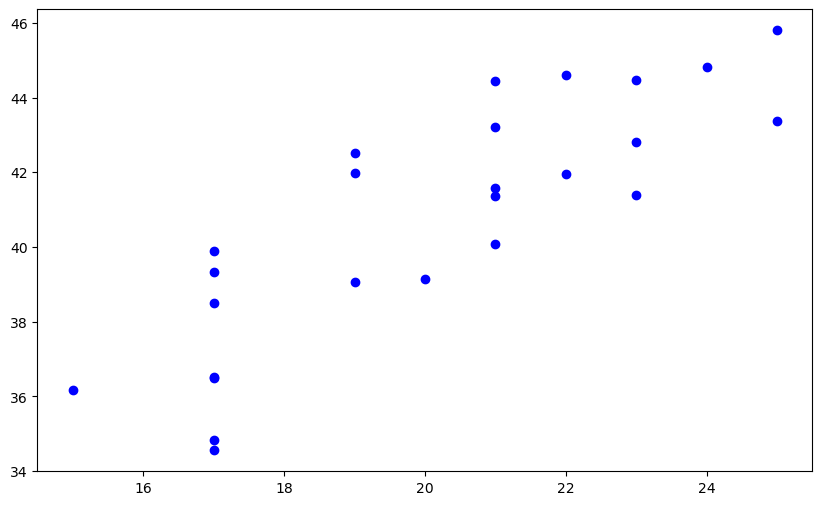

In [55]:
# Calculate average tumor volume for each mouse on Capomulin
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
avg_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(weights, avg_volume, c='blue', marker='o')



## Correlation and Regression

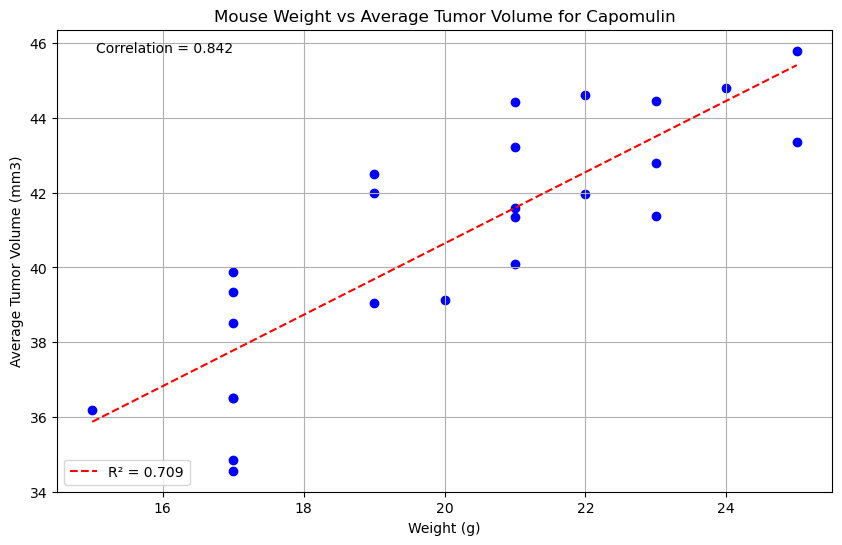

In [60]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Customize plot
# Add correlation coefficient
# Import required libraries 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
 
# Get Capomulin data
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
 
# Calculate average tumor volume and get weights
avg_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()
 
# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(weights, avg_volume, c='blue', marker='o')
 
# Calculate regression
slope, intercept, r_value, p_value, std_err = stats.linregress(weights, avg_volume)
 
# Create regression line
x_pred = np.array([min(weights), max(weights)])
y_pred = slope * x_pred + intercept
plt.plot(x_pred, y_pred, 'r--', label=f'R² = {r_value**2:.3f}')
 
# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin')
plt.grid(True)
plt.legend()
 
# Add correlation coefficient text
correlation = weights.corr(avg_volume)
plt.text(0.05, 0.95, f'Correlation = {correlation:.3f}', 
        transform=plt.gca().transAxes)
 
plt.show()